In [36]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from IPython.display import Image
import matplotlib.pyplot as plt  

%matplotlib inline

In [3]:
dfloan = pd.read_csv(r"..\data\df1_loan.csv")
dfloan.head()   

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [4]:
print("Número total de variáveis: " + str(len(dfloan.columns)))

Número total de variáveis: 15


In [5]:
dfloan.shape

(500, 15)

**Loan Application Data - Apresentando os dados**

1. Unnamed: 0 - Drop
2. Loan_ID: Unique Loan application ID
3. Gender: Gender of applicant male or female
4. Married: Married Status! Yes or no
5. Dependents: Dependents of applicant
6. Education: Graduate or Not Graduate
7. Self_Employed: Yes or No
8. ApplicantIncome: Applicant total Income
9. CoapplicantIncome: Coapplicant total Income
10. LoanAmount: Loan Amount apply for loan
11. Loan_Amount_Term: Time to repay the entire debt
12. Credit_History: Yes or No
13. Property_Area: Property Area details
14. Loan_Status: approved or not
15. Total_Income: Total income

**Análise Preliminar da Qualidade dos Dados**

In [6]:
dfloan.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [7]:
dfloan.isnull().sum().sort_values(ascending=False)

Credit_History       41
Self_Employed        27
LoanAmount           18
Loan_Amount_Term     14
Dependents           12
Gender                9
Married               3
Unnamed: 0            0
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

A coluna *Credit_History* tem uma quantidade considerável de valores null

**Data Cleaning**

In [8]:
dfloan["Credit_History"].unique()

array([ 1.,  0., nan])

Substituir os valores null por zeros, entende-se que null = 0

In [9]:
dfloan["Credit_History"].fillna(0, inplace=True)

In [10]:
dfloan.isnull().sum().sort_values(ascending=False)

Self_Employed        27
LoanAmount           18
Loan_Amount_Term     14
Dependents           12
Gender                9
Married               3
Unnamed: 0            0
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

Dropar as demais variáveis nulas

In [11]:
dfloan_clean = dfloan.dropna()

In [12]:
dfloan_clean.shape

(425, 15)

In [13]:
dfloan_clean.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [14]:
dfloan_clean = dfloan_clean.drop(columns="Unnamed: 0")

In [15]:
dfloan_clean["Credit_History"] = dfloan_clean["Credit_History"].astype(bool)
dfloan_clean["Total_Income"] = dfloan_clean.Total_Income.str.replace('$','').astype(float)

C:\Users\jmcfr\AppData\Local\Temp\ipykernel_39132\1538313697.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfloan_clean["Total_Income"] = dfloan_clean.Total_Income.str.replace('$','').astype(float)


In [16]:
dfloan_clean.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History          bool
Property_Area         object
Loan_Status           object
Total_Income         float64
dtype: object

**Análise Descritiva**

In [17]:
dfloan_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,425.0,5341.811765,5846.414373,150.0,2876.0,3867.0,5821.0,81000.0
CoapplicantIncome,425.0,1552.948047,2237.644581,0.0,0.0,1131.0,2254.0,20000.0
LoanAmount,425.0,142.851765,78.627670,17.0,100.0,127.0,165.0,650.0
Loan_Amount_Term,425.0,342.437647,64.283911,12.0,360.0,360.0,360.0,480.0
Total_Income,425.0,6894.759812,6052.143784,1442.0,4153.0,5386.0,7550.0,81000.0


In [55]:
profile = ProfileReport(dfloan_clean, title="Data Loan Profiling Report")

In [56]:
%%time
profile.to_file(r"..\output\dfloan_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.02it/s]

CPU times: total: 10.9 s
Wall time: 14.6 s


**Probabilidade Simples**

Qual a probabilidade de uma pessoa ter um emprestimo **aprovado**

In [18]:
aproved = dfloan_clean[dfloan_clean["Loan_Status"] == "Y"]
p_aproved = len(aproved) / len(dfloan_clean)

p_aproved

0.6988235294117647

**Análise:** 

De acordo com esta base de dados, a chance de uma pessoa ter um emprestimo aprovado é de *69.88%*.
Comparando com o percentual de domicílios no Brasil que algum morador conseguiu um empréstimo (23.6%)*, observamos que a database tem um percentual de aprovação muito maior que os dados brasileiros. Isto pode indicar que a base análisada é de um país desenvolvido e com um indice de inadiplência inferior ao do Brasil.

*Fonte: https://veja.abril.com.br/economia/em-meio-a-pandemia-procura-por-emprestimo-pessoal-sobe-113/


**Probabilidade da Intersecção**


Qual a probabilidade de uma pessoa ter **Histórico de Crédito** e ser **Aprovado** em um emprestimo?

 - Quando os eventos são independentes podemos utilizar P(A∩B) = P(A) × P(B)

 ![title](..\img\IntersectionAB.jpg)

In [19]:
history_and_approved = dfloan_clean[(dfloan_clean["Credit_History"] == 1) & (dfloan_clean["Loan_Status"] == "Y")]

p_history_and_approved = len(history_and_approved) / len(dfloan_clean)

p_history_and_approved

0.6141176470588235

**Análise:**

A chance de uma pessoa ter um histórico de crédito e ser aprovado em um emprestimo é de *61.41%*.
Talvez o motivo desta probabilidade P(Credit History ∩ Emprestimo Aprovado) ser menor do que P(Emprestimo Aprovado) é que estas pessoas têm um mau histórico de crédito. Este ponto precisaria de mais dados, já que a base analisada não avalia o histórico de crédito *qualitativamente*

**Probabilidade da União**

Qual a probabilidade de uma pessoa ter **Histórico de Crédito** ou ser **Aprovado** ?

 - Neste caso, trata-se de dois eventos não disjuntos. Podemos utilizar: P(A∪B)=P(A)+P(B)−P(A∩B).

  ![title](..\img\UnionAB.png)

 

In [20]:
p_history = len(dfloan_clean[dfloan_clean["Credit_History"] == 1]) / len(dfloan_clean)

p_history_or_approved = (p_history + p_aproved) - p_history_and_approved

p_history_or_approved

0.8658823529411764

**Análise:** 

A chance de uma pessoa ter histórico de crédito ou ser aprovado é de *85.58%*.
Este era o resultado esperado já que a maioria das pessoas têm histórico de crédito ou teve o emprestimo aprovado.

**Probabilidade do Complemento**

Qual a probabilidade de uma pessoa não ter **Histórico de Crédito**?

P(A') = 1 - P(A)

  ![title](..\img\venn_complementar.png)

In [21]:
p_not_history = 1 - p_history

p_not_history

0.21882352941176475

**Probabilidade da Diferença**

Qual a probabilidade de uma pessoa ser **Casada** mas não ter **Dependentes**?

P(A - B) = P(A) - P(A∩B)

In [22]:
p_married = len(dfloan_clean[dfloan_clean["Married"] == "Yes"])/len(dfloan_clean)
p_dependents_and_married = len(dfloan_clean[(dfloan_clean["Dependents"] != "0") & (dfloan_clean["Married"] == "Yes")])/len(dfloan_clean)

p_married_no_dependents = p_married - p_dependents_and_married

p_married_no_dependents

0.2894117647058823

**Análise**:

Observa-se que a chance de uma pessoa ser casada, mas não ter depentes é baixa, apenas de *28.94%*

**Probabilidade Condicional**

Qual a probabilidade do emprestimo ser aprovado sabendo que o solicitante é do sexo masculino?

  ![title](..\img\condprob.svg)

In [27]:
P_homem = len(dfloan_clean[dfloan_clean["Gender"] == "Male"])/len(dfloan_clean) #P(H)

P_homem_aprovado = len(dfloan_clean[(dfloan_clean["Gender"] == "Male") & (dfloan_clean["Loan_Status"] == "Y")])/len(dfloan_clean) #P(A i H)

ProbCondHomem = P_homem_aprovado / P_homem #P(A i H) / P(H)

ProbCondHomem

0.7097701149425287

Qual a probabilidade do emprestimo ser aprovado sabendo que o solicitante é do sexo feminino?


In [28]:
P_mulher = len(dfloan_clean[dfloan_clean["Gender"] == "Female"])/len(dfloan_clean) #P(M)

P_mulher_aprovado = len(dfloan_clean[(dfloan_clean["Gender"] == "Female") & (dfloan_clean["Loan_Status"] == "Y")])/len(dfloan_clean) #P(A i M)

ProbCondMulher = P_mulher_aprovado / P_mulher #P(A i M) / P(M)

ProbCondMulher

0.6493506493506493

In [29]:
dfloan_clean.groupby(["Gender"]).ApplicantIncome.agg(["min", "median", "mean", "max"])

,min,median,mean,max
Gender,,,,
Female,1378,3692.0,4573.974026,17263
Male,150,3922.0,5511.706897,81000


**Análise**:

A chance de um emprestimo ser aprovado dado que o solicitante é do sexo masculino é de *70.9%*, enquanto a mesma chance para o sexo feminino é de *64.9%*.

Esta diferença pode ser explicada devido aos homens apresentarem uma renda maior (na base analisada). Podemos observar que a os valores de mediana e renda máxima são superiores ao do sexo feminino.



**Teorema de Bayes**

 ![title](..\img\bayes-formula.png)

Qual a probabilidade de ser homem dado que o emprestimo foi aprovado?



In [26]:
P_homem_dadoq_aprovado = (P_homem * ProbCondHomem) / ((P_homem * ProbCondHomem) + (P_mulher * ProbCondMulher))

P_homem_dadoq_aprovado

0.8316498316498316

In [31]:
P_mulher_dadoq_aprovado = (P_mulher * ProbCondMulher) / ((P_homem * ProbCondHomem) + (P_mulher * ProbCondMulher))

P_mulher_dadoq_aprovado

0.16835016835016833

In [32]:
#Check
P_homem_dadoq_aprovado + P_mulher_dadoq_aprovado

1.0

**Variáveis Aleatórias**

(array([416.,   7.,   1.,   1.]),
 array([ 1442. , 21331.5, 41221. , 61110.5, 81000. ]),
 <BarContainer object of 4 artists>)

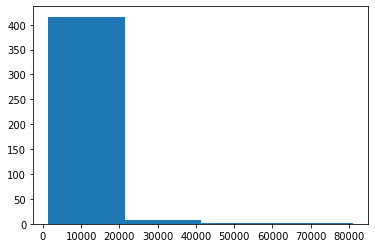

In [44]:
#Observar a distribuição de renda

plt.hist(dfloan_clean["Total_Income"], bins=4)

In [68]:
dfloan_clean["Total_Income_Range"] = pd.cut(dfloan_clean["Total_Income"], [0, 20000, 40000, 60000, 100000], labels= ["0-20", "21-40", "41-60", "61-100"])

In [74]:
dfloan_clean.sort_values(by="Total_Income", ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Range
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,False,Rural,N,81000.0,61-100
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,True,Semiurban,Y,43897.0,41-60
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,False,Semiurban,Y,39999.0,21-40
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,True,Semiurban,Y,37719.0,21-40
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,True,Semiurban,N,33846.0,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,True,Rural,Y,2213.0,0-20
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,False,Rural,N,2178.0,0-20
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,True,Semiurban,Y,1963.0,0-20
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,True,Rural,N,1950.0,0-20


**Qual faixa de renda é mais frequente?**

In [79]:
dfloan_clean.groupby("Total_Income_Range")["Loan_Status"].count()

Total_Income_Range
0-20      414
21-40       9
41-60       1
61-100      1
Name: Loan_Status, dtype: int64

**Função de Probabilidade**

Qual faixa de renda tem maior probabilidade de ser aprovada?

In [90]:
dfloan_clean.groupby("Total_Income_Range").apply(lambda x: x[x["Loan_Status"] == "Y"]["Loan_ID"].nunique()) / dfloan_clean.groupby("Total_Income_Range")["Loan_ID"].nunique()

Total_Income_Range
0-20      0.705314
21-40     0.444444
41-60     1.000000
61-100    0.000000
dtype: float64